## Data Loader

In [1]:
import minslam.data_loader as data_loader
dataset_folder = '../test/traj_examples'
loader = data_loader.DataLoader(dataset_folder)
traj = loader._load_traj(
    'tum', 'tum_no_timestamp.txt', add_timestamps=True)
print(traj)

434 poses, 66.983m path length, 433.000s duration


Adding noise, seed=24244


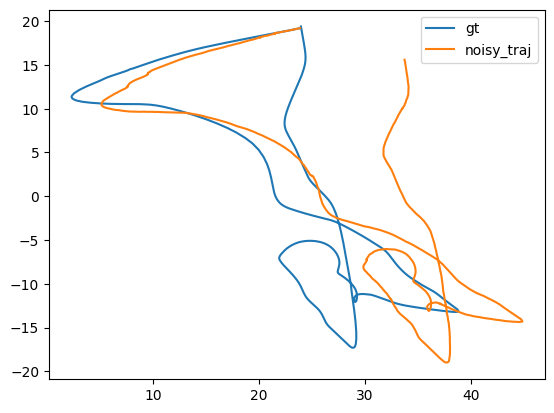

In [11]:
import minslam.data_loader as data_loader
import matplotlib.pyplot as plt
import numpy as np
dataset = data_loader.TartanAirLoader('~/Projects/curly_slam/data/tartanair/scenes/soulcity/Easy/P001/')
color, depth = dataset.read_current_rgbd()
# plt.imshow(color[:,:,::-1])
# plt.imshow(depth.clip(0, 100))
dataset.read_ground_truth()
noisy_traj = dataset.add_noise(dataset.gt, [0.005,0.005], [0.01, 0.01])
gt_poses = np.array([x[:3, 3] for x in dataset.gt.poses_se3])
noisy_traj_poses = np.array([x[:3, 3] for x in noisy_traj.poses_se3])
plt.plot(gt_poses[:,0], gt_poses[:,1], label='gt')
plt.plot(noisy_traj_poses[:,0], noisy_traj_poses[:,1], label='noisy_traj')
plt.legend()